In [96]:
import numpy as np 
import sympy as sp
import math
import scipy.stats as sts 
from sympy import symbols, Eq, solve
import scipy.special as sc
import matplotlib.pyplot as plt 
from scipy import integrate
from scipy import *
from statsmodels.sandbox.distributions.sppatch import expect_v2
%matplotlib inline 

# **Номер 1**

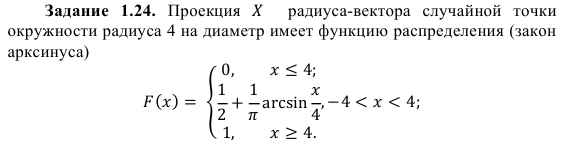

# **Пункт 1)**

## Находим плотность распределения функции:

In [97]:
x = sp.symbols('x')
rasp = sp.diff(1/2 + 1/sp.pi*sp.asin(x/4))
rasp

1/(4*pi*sqrt(1 - x**2/16))

## Строим график распределения плотности:

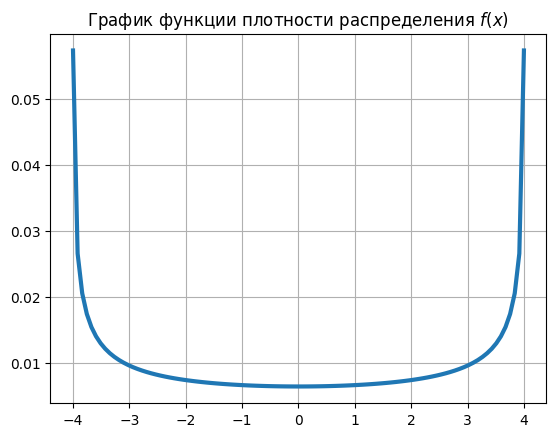

In [98]:
y = np.linspace(-3.999, 3.999, 100)
z = np.linspace(-3.999, 3.999, 99)
Rasp = np.diff(1/2 + 1/np.pi*np.arcsin(y/4))
plt.title('График функции плотности распределения $f(x)$')
plt.plot(z,Rasp , lw=3)
plt.grid(True)

# **Пункт 2)**

## **Мода отсутствует так как функция распределения в точках -4 и 4 стремится к бесконечности**

## Находим медиану

In [99]:
'''
    Находим медиану по определению:
    F(x) = 1/2
    x - медиана
 ''' 
x = sp.symbols('x')
equation = Eq(1/2 + 1/sp.pi*sp.asin(x/4), 1/2)
solution = solve(equation, x)
print('Медиана равна:', solution)

Медиана равна: [0.0]


## Находим Математическое ожидание

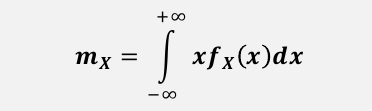

In [100]:
rasp1 = lambda x : x*sp.diff(1/2 + 1/sp.pi*sp.asin(x/4))# Задаем подынтегральное выражение по формуле мат ожидания
M = integrate.quad(rasp1, -np.inf, np.inf)
print('Мат ожидание равно:', M)

Мат ожидание равно: (0.0, 0.0)


## Находим Дисперсию

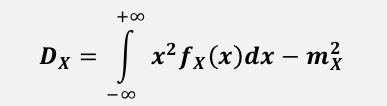

In [101]:
''' 
        Так как m = 0, то из формулы можно убрать мат ожидание и получится:
'''
rasp2 = lambda x: (x**2*(1/(4*sp.pi*sp.sqrt(1-x**2/16))))    # Задаем подынтегральное выражение по формуле для дисперсии
D = integrate.quad(rasp2, -4, 4)
print('Дисперсия равна:', D)

Дисперсия равна: (7.999999999998872, 1.9846263299427847e-08)


## Ищем квантиль 0.25 порядка

In [102]:
'''
    Находим квантиль по определению:
    F(x) = 0.25
    x - квантиль
 ''' 
x = sp.symbols('x')
equation = Eq(1/2 + 1/sp.pi*sp.asin(x/4), 0.25)
solution = solve(equation, x)
print('Квантиль порядка 0.25 равна:', solution)

Квантиль порядка 0.25 равна: [-2.82842712474619]


## Ищем квантиль 0.75 порядка

In [103]:
'''
    Находим квантиль по определению:
    F(x) = 0.75
    x - квантиль
 ''' 
x = sp.symbols('x')
equation = Eq(1/2 + 1/sp.pi*sp.asin(x/4), 0.75)
solution = solve(equation, x)
print('Квантиль порядка 0.75 равна:', solution)

Квантиль порядка 0.75 равна: [2.82842712474619]


## Ищем начальный момент 2-го и 3-го порядка

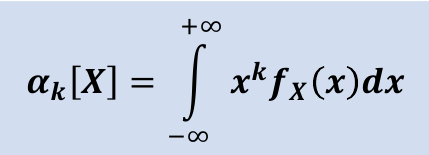

In [104]:
''' 
        Начальный момент 2-го порядка равен дисперсии (Исходя из формулы момента k-го порядка)
'''
rasp5 = lambda x: (x**2*(1/(4*sp.pi*math.sqrt(1-x**2/16))))# Задаем подынтегральное выражение 
rasp3 = lambda x: (x**3*sp.diff(1/2 + 1/sp.pi*sp.asin(x/4)))# Задаем подынтегральное выражение 
a3 = integrate.quad(rasp3, -np.inf, np.inf)
a2 = integrate.quad(rasp5, -4, 4)
print('Начальный момент порядка 2 равен:', a2, '\n', 'Начальный момент порядка 3 равен:', a3)

Начальный момент порядка 2 равен: (7.999999999998872, 1.9846263299427847e-08) 
 Начальный момент порядка 3 равен: (0.0, 0.0)


# **Пункт 3)**

## Ищем вероятность попадания в промежуток

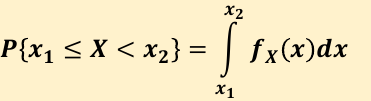

In [105]:
rasp4 = lambda x: (1/(4*sp.pi*math.sqrt(1-x**2/16)))   # Задаем подынтегральное выражение 
Px1x2 = integrate.quad(rasp4,-2, 2)    # Так как M[x] = 0, то пределы будут соответствущие
print('Вероятность попадания в промежуток:',Px1x2)

Вероятность попадания в промежуток: (0.3333333333333333, 4.490433504762121e-15)


# **Номер 2**

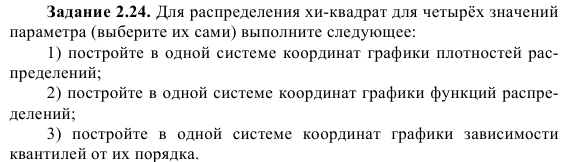

# **Пункт 1)**

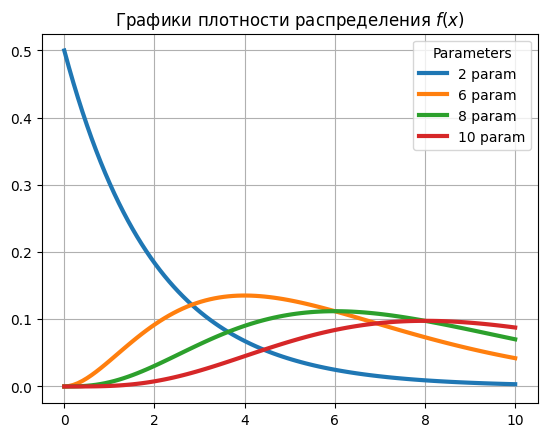

In [106]:
raspred1 = sts.chi2(2)
raspred2 = sts.chi2(6)
raspred3 = sts.chi2(8)
raspred4 = sts.chi2(10)

x_n = np.linspace(0 , 10 , 100)

f_x_n1 = raspred1.pdf(x_n)
f_x_n2 = raspred2.pdf(x_n)
f_x_n3 = raspred3.pdf(x_n)
f_x_n4 = raspred4.pdf(x_n)

plt.plot(x_n , f_x_n1, label = '2 param',lw = 3)
plt.plot(x_n , f_x_n2, label = '6 param',lw = 3)
plt.plot(x_n , f_x_n3, label = '8 param',lw = 3)
plt.plot(x_n , f_x_n4, label = '10 param',lw = 3)

plt.legend(title ='Parameters')

plt.title('Графики плотности распределения $f(x)$')
plt.grid(True)

# **Пункт 2)**

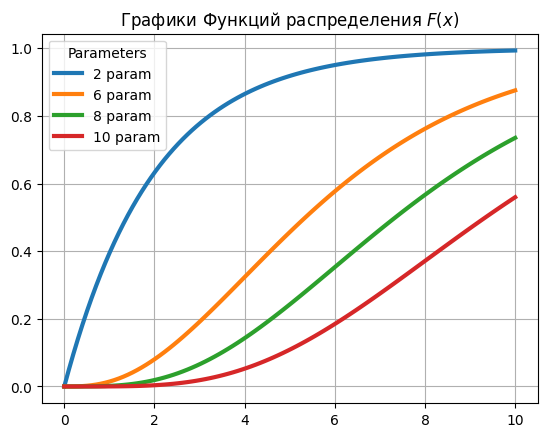

In [107]:
raspred1 = sts.chi2(2)
raspred2 = sts.chi2(6)
raspred3 = sts.chi2(8)
raspred4 = sts.chi2(10)

x_n = np.linspace(0 , 10 , 100)

f_x_n1 = raspred1.cdf(x_n)
f_x_n2 = raspred2.cdf(x_n)
f_x_n3 = raspred3.cdf(x_n)
f_x_n4 = raspred4.cdf(x_n)

plt.plot(x_n , f_x_n1, label = '2 param',lw = 3)
plt.plot(x_n , f_x_n2, label = '6 param',lw = 3)
plt.plot(x_n , f_x_n3, label = '8 param',lw = 3)
plt.plot(x_n , f_x_n4, label = '10 param',lw = 3)

plt.legend(title ='Parameters')

plt.title('Графики Функций распределения $F(x)$')
plt.grid(True)

# **Пункт 3)**

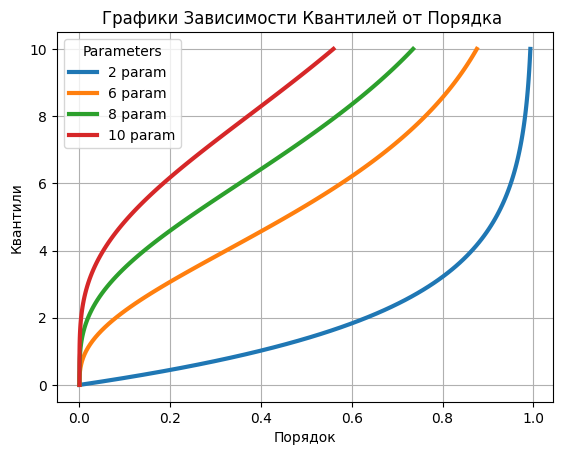

In [108]:
raspred1 = sts.chi2(2)
raspred2 = sts.chi2(6)
raspred3 = sts.chi2(8)
raspred4 = sts.chi2(10)

x_n = np.linspace(0 , 10 , 100 )
y_n = np.linspace(0 ,1 , 100)

f_x_n1 = raspred1.cdf(x_n) 
f_x_n2 = raspred2.cdf(x_n) 
f_x_n3 = raspred3.cdf(x_n)
f_x_n4 = raspred4.cdf(x_n) 

plt.plot( f_x_n1,x_n , label = '2 param',lw = 3)
plt.plot( f_x_n2,x_n , label = '6 param',lw = 3)
plt.plot( f_x_n3,x_n , label = '8 param',lw = 3)
plt.plot( f_x_n4,x_n , label = '10 param',lw = 3)

plt.legend(title ='Parameters')
plt.ylabel('Квантили')
plt.xlabel('Порядок')

plt.title('Графики Зависимости Квантилей от Порядка ')
plt.grid(True)